In [3]:
from nltk import Text
from wordcloud import WordCloud # 워드클라우드
import matplotlib.pyplot as plt
import koreanize_matplotlib # 매트플롯에서 한글 나오게 해주는 라이브러리
from ckonlpy.tag import Twitter, Postprocessor
from collections import Counter

font_path = 'C:\Windows\Fonts\malgun.ttf'

In [21]:
text = '''
'프롤로그
첫 출근
깔끔한 치마 정장, 단정하게 빗어 넘긴 머리, 짙지도 옅지도
않은 산뜻한 화장. 모든 것이 완벽했다. 참으려 해도 자꾸 얼굴
에 웃음이 떠올랐다. 날씨도 화창했다. 따사로운 햇살이 자신의
앞날을 축복하는 것처럼 느껴졌고 세상 모든 사람들이 자신을
향해 박수를 보내는 것 같았다. 미주의 머릿속에 이미 몇 번이고
음미했던 합격의 감동이 다시 떠올랐다.
...
“출근은 언제부터 가능하겠어요?”
 “내일 당장이라도 나오겠습니다.”
 “하하, 내일은 너무 급하니까 이렇게 해요. 이번 주말까지는
개인적인 일을 정리하시고, 다음 주 월요일부터 정식 출근하는
걸로 합시다.'

“예. 알겠습니다. 감사합니다! 열심히 하겠습니다!”
...
다시 생각해도 가슴 벅찬 기억이었다. 
미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으
로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는
말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누
구와 나눌 수조차 없었다. 그런 고통의 나날을 넘어서 이제 그
좁은 취업문을 갓 돌파한 미주에게 두려울 것은 아무 것도 없었
다. 세상이 모두 자기 것처럼 여겨지는 자신감만이 넘쳐날 뿐이
었다. 
‘그래! 회사가 좀 작으면 어때? 나 여기서 정말 열심히 해서
승진도 빨리 하고 꼭 최고의 인재가 될 거야! 앞으로는 모든 일
이 다 잘 될거야!’
미주는 가벼운 발걸음으로 첫 출근길을 나섰다.
'''

1년 후
“에휴!”
미주가 한 숨을 쉬며 털썩 자리에 앉았다. 얼굴이 붉어진 채로
연신 이마에 흐르는 땀을 닦아내는 모습이 무척 화가 난 듯 보였다.
‘미주씨! 이거 어떡할 거야? 자기 한번 믿어달라더니……. 강
좌 매출 다죽이고 도대체 어쩌자는 거야? 아무튼 수단 방법 가
리지 말고 목표액 채워!’
부장의 신경질적인 목소리가 떠오르자 미주는 머리가 지끈거
렸다. 새로 나온 동영상 강좌의 판매가 저조하자 마케팅 부장이
관계자 회의를 소집해서 한바탕 쏘아댔는데, 특히 프로모션을 맡
았던 미주는 그 중에서도 가장 노골적인 비난을 받았던 것이다.
미주는 억울했다. 이번에 나온 동영상 강좌는 급하게 만드는
바람에 오류가 너무 많았고, 그로 인해 상품평에 악플(나쁜 평가)
들이 넘쳐났다. 그걸 본 다른 고객들도 강좌를 외면했기 때문에
판매가 저조한 것이었고, 따지고 보면 가장 큰 책임은 제작팀에
있었다. 
하지만 부장의 생각은 달랐다.
 ‘마케팅이나 영업하는 사람은 물건 탓하는 거 아냐. 꼭 자기가
못 팔면 물건이 어쩌고 서비스가 어쩌고……. 그래서 발전이 있
겠어?’
참으로 간편한 논리였다. 물론 미주는 수긍할 수 없었다.
 ‘강좌가 엉망진창이라 안 팔리는 걸 나보고 어떻게 하라는 거
야?’
속으로 이렇게 투덜거리고 있는데 동료인 수진과 지은이 다가
와 어깨를 두드렸다.
 “야! 커피나 한 잔 하러 가자.”
 “너 또 부장 얘기 하는 거에 토 달다 욕먹었지? 그냥 그 인간
하자는 대로 놔둬. 입바른 소리 해봤자 너만 피곤하다니까. 그리
고 너 아직도 그 인간 스타일을 모르겠냐? 무조건 잘되면 자기
탓 못되면 아랫사람 탓이잖아. 니가 그렇게 고집 피워서 제대로
아이디어 내봤자 너한테 돌아오는 거 하나도 없고, 그러다 혹시
잘못되면 너만 독박 쓴다. 그냥 그 인간이 하자는 대로 해서 혹
시 일 망쳐도 자기가 할 말 없게 만들어야 해.”
수진이 말했다.
 “야. 그것도 완전 안심할 수는 없더라. 지난번에 옆팀 한대리가
 올린 보고서 부장이 이 정도면 됐다고 하고 사장한테 보고
해놓고는, 사장이 내용이 부실하다고 지적하니까 바로 달려와서
한 대리한테 엄청 뭐라뭐라 했다던데? 아니, 자기가 OK 해놓고
서 왜 나중 에 와서 욕을 하냐고 욕을. 하여간에 진짜 인간 특이
하다니까.”
지은도 거들었다. 
동료들이 옆에서 신나게 부장의 욕을 해주자 미주는 조금 마
음이 풀리는 것도 같았다. 원래 기분 나쁜 일이 있을 때 친구들
이 자기보다 더 흥분해서 자기 편을 들어주면 그것만으로도 종
종 기분이 풀리는 미주였다. 하지만 그래도 답답한 마음이 완전
히 가신 것은 아니었다. 미주가 친구들을 보며 물었다.
 “너희 보기엔 어떤 것 같아? 우리 이 회사에 계속 있으면 무
슨 비전이 있을까? 저 부장 밑에 있어봤자 발전도 없을 것 같고
뭔가 다른 방법을 찾아야 하지않을까?”
미주는 이번에도 친구들이 호응해주길 기대했다. 하지만 예상
과 달리 친구들은 시큰둥한 표정이었다.
 “우리도 더 큰 회사 더 좋은 회사 가고 싶기야 하지. 그런데
어떡하냐? 우리처럼 평범하게 대학만 졸업하고 별 다른 자격증
같은 것도 없으면 그런 좋은 회사에서 오라고 하지도 않는데. 그
냥 뭐 좀 짜증은 나지만 그래도 또 윗사람들 신경 안 쓰면 다닐
만해. 우리 회사 분위기가 좀 자유롭긴 하잖아. 대기업 가면 메
신저 내용도 다 검사하고 메일 주고받은 것도 다 검사하고 그런
다더라.”
수진이 말했다.
 “맞아. 나는 솔직히 근무시간에 인터넷쇼핑도 많이 하는데 그런 큰 회사 가면 하루종일 일만 해야하니까 답답해 죽을지도
몰라. 지금처럼 일하다 커피 마시러 나올 수도 없고. 그러니 그
냥 연봉 좀 적고 짜증 좀 나고 해도 난 뭐견딜만 해. 회사에서
돈을 조금 주면 우리도 받은 만큼만 일하면 되잖아?”
지은도 같은 의견이었다. 
친구들은 큰 불만이 없는 모양이었다. 아니 불만이 있어도 포기 하고
 그냥 거기에 맞춰 자신이 적응하기로 한 모양이었다.
 “나는 이대로는 못 있겠어. 내가 진짜 이 회사 떠나고 다른 곳
가던지 해야지. 이렇게 나를 몰라주고 체계도 하나 없는 회사에
서 더 이상 시간 낭비하기 싫어.”
미주가 단호한 목소리로 얘기했다.
 “그럼 어떻게 할건데? 얘. 대기업 공채 보면 누가 너 뽑아준대
니? 너나 나나 다 우리나라에서 제일 큰 회사부터 쭉 썼다가 다
떨어지고 지금 여기 온 거잖아. 우리도 대학 다닐 때까지만 해도
어디 이런 어정쩡한 회사 올 줄 알았냐? 말이야 쉽지만 현실은
그리 만만치 않았다고. 야! 나는 그 합격자 발표 날 때마다 메일
에서 탈락했다는 문구 확인하던 기억, 끔찍해서 다시 떠올리고
싶지도 않다.”
수진이 조금 날카로워진 목소리로 말했다.
 “그래 맞아. 그리고 얘 괜히 너 그만 둔다 어쩐다 얘기 하고 다
니다 찍히면 지금보다 훨씬 더 힘들어진다. 만약에 여기 그만 두
고 다른데 가려고 해도 소문 안 나게 조용히 알아봐야 해. 괜히
취업정보 사이트에 이력서 같은 거 올려놓지 마. 그거 우리 부장
이 툭하면 들어가서 혹시 우리 직원들 중에 이력서 등록한 사람
없나 찾아본다더라. 개발팀 정 대리도 이직한다고 이력서 올려놨
다가 부장한테 걸려서 난리 났었잖아. 사장한테까지 얘기가 올라
가서 뭐 당장 사표 쓰라는 소리도 듣고 지금도 완전 윗사람들한
테 동네북이야.”
지은도 걱정스러운 목소리로 말했다. 
친구들의 얘기에 미주는 가슴 속의 답답함이 더 커지는 느낌
이었다.
 “모르겠어. 아무튼 나는 여기서 더는 못 견디겠고 다른 회사를
가던지 아니면 대학원이라도 갈래. 대학원 졸업하면 좀 더 좋은
회사 갈 수 있겠지 뭐. 여기는 이제 생각만 해도……. 윽! 지겨
워!”
미주가 몸서리를 치며 말했다.
“하긴. 내가 아는 사람들 봐도 회사 다니다 대학원 많이들 가
더라. 괜찮을지도 모르지 뭐.”
 “진짜. 대학원 가면 좋겠다. 아! 나도 다시 학생시절로 돌아가
고 싶다. 회사생활은 너무 지겨워.”
친구들이 부러운 듯 말했다. 
미주는 갑자기 빨리 들어가서 인터넷으로 대학원에 대해 알아
보고 싶은 마음이 들었다

In [5]:
twitter = Twitter()

d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [25]:
# 추가할 단어 리스트
words_to_add = [
    '그냥', '빗어넘긴', '따사로운', '향해', '급하니까', '해요', '개인적인',
    '걸로', '이었다', '지옥과도', '취업난', '으로', '많이도', '해야', 
    '상실감', '누구', '수조차', '넘어서', '없었다', '열심히', '한숨쉬며', '붉어진', '친구들', '향해', '개인적', '상실감', '누구'
]

# 리스트를 순회하며 단어를 추가
for word in words_to_add:
    twitter.add_dictionary(word, 'Noun')

In [26]:
twitter.pos(text)

[("'", 'Punctuation'),
 ('프롤로그', 'Noun'),
 ('첫', 'Noun'),
 ('출근', 'Noun'),
 ('깔끔한', 'Adjective'),
 ('치마', 'Noun'),
 ('정장', 'Noun'),
 (',', 'Punctuation'),
 ('단정', 'Noun'),
 ('하게', 'Verb'),
 ('빗어', 'Verb'),
 ('넘긴', 'Verb'),
 ('머리', 'Noun'),
 (',', 'Punctuation'),
 ('짙', 'Adjective'),
 ('지도', 'Noun'),
 ('옅', 'Adjective'),
 ('지도', 'Noun'),
 ('않은', 'Verb'),
 ('산뜻한', 'Adjective'),
 ('화장', 'Noun'),
 ('.', 'Punctuation'),
 ('모든', 'Noun'),
 ('것', 'Noun'),
 ('이', 'Josa'),
 ('완벽', 'Noun'),
 ('했다', 'Verb'),
 ('.', 'Punctuation'),
 ('참으려', 'Verb'),
 ('해도', 'Noun'),
 ('자꾸', 'Noun'),
 ('얼굴', 'Noun'),
 ('에', 'Josa'),
 ('웃음', 'Noun'),
 ('이', 'Josa'),
 ('떠올랐다', 'Verb'),
 ('.', 'Punctuation'),
 ('날씨', 'Noun'),
 ('도', 'Josa'),
 ('화창', 'Noun'),
 ('했다', 'Verb'),
 ('.', 'Punctuation'),
 ('따사로운', 'Noun'),
 ('햇살', 'Noun'),
 ('이', 'Josa'),
 ('자신', 'Noun'),
 ('의', 'Josa'),
 ('앞날', 'Noun'),
 ('을', 'Josa'),
 ('축복', 'Noun'),
 ('하는', 'Verb'),
 ('것', 'Noun'),
 ('처럼', 'Noun'),
 ('느껴졌고', 'Verb'),
 ('세상', 'Noun'),
 ('모

In [8]:
ngrams = [
    (('첫', '출근'), 'Noun'),
    (('짙', '지도'), 'Noun'),
    (('옅', '지도'), 'Noun'),
    (('단정', '하게'), 'Noun'),
    (('모든', '것'), 'Noun'),
    (('완벽', '했다'), 'Noun'),
    (('몇', '번'), 'Noun'),
    (('하는', '것'), 'Noun'),
    (('향', '해'), 'Noun'),
    (('따사', '로운'), 'Noun'),
    (('몇', '번'), 'Noun'),
    (('하겠', '어요'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('두려울', '것'), 'Noun'),
    (('될', '거야'), 'Noun'),
    (('이상', '하니니'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('생각', '해도'), 'Noun'),
    (('생각', '해도'), 'Noun'),
]

# 리스트를 순회하며 단어를 추가
for ngram, pos in ngrams:
    word = ' '.join(ngram)  # 튜플을 공백으로 결합하여 단어 생성
    twitter.add_dictionary(word.strip(), pos)  # 단어를 사전에 추가 (strip으로 공백 제거)



In [9]:
stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '의', '와', '과', '도', '으로', '로', '에서',
    '하지만', '그러나', '그리고', '또한', '즉', '만약', '왜냐하면', '그래서', '그런', '저',
    '그', '이', '그것', '여기', '저기', '저것', '우리', '너희', '당신', '나', '너', '누구',
    '무엇', '어제', '오늘', '내일', '그냥', '매우', '이미', '너무', '어떤', '모든', '아무',
    '각', '거의', '여러', '함께', '대한', '때문', '위해', '하나', '둘', '셋', '중', '것', '안', '했다', '처럼', '었다', '였다', '렸다', '듯', '속', '난', '종', '내', '고' '못','마','적','후','냥','해', '또', '치','니', '죽','수','고',
    '어쩌', '어가','지고','마다','까지','을지', '해주','하니','부터', '거','해도', '해야', '하자', '대로', '더','다가','지도'
]


In [10]:
postprocessor = Postprocessor(twitter, stopwords=stopwords, ngrams=ngrams)

In [11]:
postprocessor.pos(text)

[("'", 'Punctuation'),
 ('프롤로그', 'Noun'),
 ('첫 - 출근', 'Noun'),
 ('깔끔한', 'Adjective'),
 ('치마', 'Noun'),
 ('정장', 'Noun'),
 (',', 'Punctuation'),
 ('단정 - 하게', 'Noun'),
 ('빗어', 'Verb'),
 ('넘긴', 'Verb'),
 ('머리', 'Noun'),
 (',', 'Punctuation'),
 ('짙 - 지도', 'Noun'),
 ('옅 - 지도', 'Noun'),
 ('않은', 'Verb'),
 ('산뜻한', 'Adjective'),
 ('화장', 'Noun'),
 ('.', 'Punctuation'),
 ('모든 - 것', 'Noun'),
 ('완벽 - 했다', 'Noun'),
 ('.', 'Punctuation'),
 ('참으려', 'Verb'),
 ('자꾸', 'Noun'),
 ('얼굴', 'Noun'),
 ('웃음', 'Noun'),
 ('떠올랐다', 'Verb'),
 ('.', 'Punctuation'),
 ('날씨', 'Noun'),
 ('화창', 'Noun'),
 ('.', 'Punctuation'),
 ('따사로운', 'Noun'),
 ('햇살', 'Noun'),
 ('자신', 'Noun'),
 ('앞날', 'Noun'),
 ('축복', 'Noun'),
 ('하는 - 것', 'Noun'),
 ('느껴졌고', 'Verb'),
 ('세상', 'Noun'),
 ('사람', 'Noun'),
 ('들이', 'Verb'),
 ('자신', 'Noun'),
 ('향해', 'Noun'),
 ('박수', 'Noun'),
 ('보내는', 'Verb'),
 ('같았다', 'Adjective'),
 ('.', 'Punctuation'),
 ('미주', 'Noun'),
 ('머릿속', 'Noun'),
 ('몇 - 번', 'Noun'),
 ('이고', 'Josa'),
 ('음미', 'Noun'),
 ('했던', 'Verb'),
 ('합격'

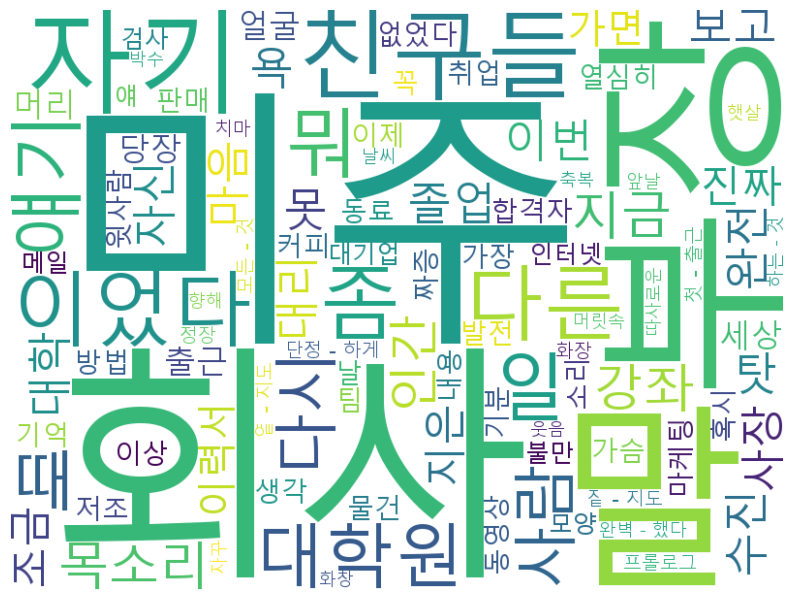

In [12]:
processed_result = postprocessor.pos(text)

# 명사만 추출 (Noun)
nouns = [word for word, pos in processed_result if pos == 'Noun']

# 명사 빈도수 계산
nouns_count = Counter(nouns)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로 (Windows 기준)
    background_color='white',
    width=800,
    height=600,
    max_words=100,
    min_word_length=3
).generate_from_frequencies(nouns_count)

# 워드클라우드 출력
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 여기부터는 강사님이 알려주신 pdf 불러오기 방법을 통해 시도

In [13]:
stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '의', '와', '과', '도', '으로', '로', '에서',
    '하지만', '그러나', '그리고', '또한', '즉', '만약', '왜냐하면', '그래서', '그런', '저',
    '그', '이', '그것', '여기', '저기', '저것', '우리', '너희', '당신', '나', '너', '누구',
    '무엇', '어제', '오늘', '내일', '그냥', '매우', '이미', '너무', '어떤', '모든', '아무',
    '각', '거의', '여러', '함께', '대한', '때문', '위해', '하나', '둘', '셋', '중', '것', '안', '했다', '처럼', '었다', '였다', '렸다', '듯', '속', '난', '종', '내', '고' '못','마','적','후','냥','해', '또', '치','니', '죽','수','고',
    '어쩌', '어가','지고','마다','까지','을지', '해주','하니','부터', '거','해도', '해야', '하자', '대로', '더','다가','지도', '보', '요','이아','기','고하','습','성','자','명'
]

In [14]:
postprocessor = Postprocessor(twitter, stopwords=stopwords, ngrams=ngrams)

In [15]:
import fitz  # PyMuPDF
from ckonlpy.tag import Twitter
from nltk.text import Text

# Twitter 형태소 분석기 객체 생성
twitter = Twitter()

# PDF 파일 열기 및 텍스트 추출
pdf_path = './[조동성, 김성민]장미와 찔레.PDF'
pdf = fitz.open(pdf_path)
pdf_text = ''

# 페이지별로 텍스트 추출
for page_num in range(pdf.page_count):
    page = pdf.load_page(page_num)  # 페이지 로드
    pdf_text += page.get_text()

pdf.close()  # PDF 파일 닫기

# 텍스트의 처음 10,000자를 명사로 추출

tokenized_text = postprocessor.pos(pdf_text[:])

filtered_result = [word for word, pos in processed_result if (len(word) > 1) and pos == 'Noun']

# 명사 빈도수 계산
filtered_count = Counter(filtered_result)

# 추출한 단어로 Text 객체 생성 및 빈도수 확인
text_count = Text(filtered_count, name='장미와 찔레')
text_count.vocab()

FreqDist({'프롤로그': 1, '첫 - 출근': 1, '치마': 1, '정장': 1, '단정 - 하게': 1, '머리': 1, '짙 - 지도': 1, '옅 - 지도': 1, '화장': 1, '모든 - 것': 1, ...})

In [16]:
wc = WordCloud(width=640, height=360, background_color='white', font_path=font_path, max_words=100, min_word_length=3)
# max_words : 그래프에 표시할 최대 단어 개수, min_word_length : 단어가 그래프에 나오기 위한 최소 등장 횟수

In [17]:
filtered_result

['프롤로그',
 '첫 - 출근',
 '치마',
 '정장',
 '단정 - 하게',
 '머리',
 '짙 - 지도',
 '옅 - 지도',
 '화장',
 '모든 - 것',
 '완벽 - 했다',
 '자꾸',
 '얼굴',
 '웃음',
 '날씨',
 '화창',
 '따사로운',
 '햇살',
 '자신',
 '앞날',
 '축복',
 '하는 - 것',
 '세상',
 '사람',
 '자신',
 '향해',
 '박수',
 '미주',
 '머릿속',
 '몇 - 번',
 '음미',
 '합격',
 '감동',
 '다시',
 '출근',
 '언제',
 '가능',
 '하겠 - 어요',
 '당장',
 '하하',
 '급하니까',
 '해요',
 '이번',
 '주말',
 '개인적인',
 '정리',
 '다음',
 '월요일',
 '정식',
 '출근',
 '걸로',
 '감사',
 '열심히',
 '다시',
 '생각 - 해도',
 '가슴',
 '기억',
 '이었다',
 '미주',
 '대학',
 '졸업',
 '반년',
 '이상',
 '지옥과도',
 '취업난',
 '많이도',
 '좌절',
 '합격자',
 '명단',
 '마음',
 '갈가리',
 '상실감',
 '수조차',
 '없었다',
 '고통',
 '나날',
 '넘어서',
 '이제',
 '취업',
 '돌파',
 '미주',
 '두려울 - 것',
 '세상',
 '모두',
 '자기',
 '자신감',
 '회사',
 '정말',
 '열심히',
 '승진도',
 '최고',
 '인재',
 '될 - 거야',
 '미주',
 '발걸음',
 '출근길',
 '미주',
 '털썩',
 '자리',
 '얼굴',
 '붉어진',
 '이마',
 '아내',
 '모습',
 '무척',
 '화가',
 '미주',
 '자기',
 '한번',
 '달라',
 '더니',
 '매출',
 '도대체',
 '어쩌자',
 '수단',
 '방법',
 '리지',
 '목표',
 '부장',
 '신경질',
 '목소리',
 '미주',
 '머리',
 '지끈',
 '동영상',
 '강좌',
 '판매',
 '저조',
 '마케팅',
 '부장',
 '관계

In [18]:
cloud = wc.generate_from_frequencies(filtered_count) # 빈도수 정보로 시각화하는 워드클라우드

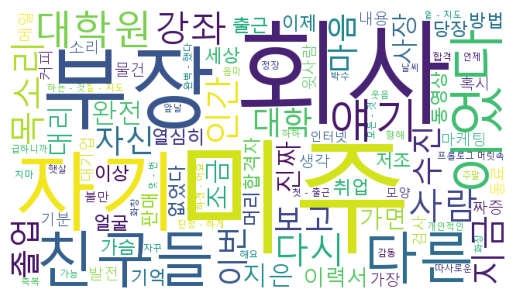

In [19]:
plt.imshow(cloud)
plt.axis('off')
plt.show()